In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# Preuzimanje podataka od 2000 godine do 2025
ticker_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2025-01-01'

df = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

if df.empty:
    print("Preuzimanje podataka nije uspelo.")
    sys.exit()
else:
    print(f"Podaci uspešno preuzeti. Broj redova: {len(df)}")


# 1. Dan u nedelji
df['Day_Of_Week'] = df.index.dayofweek
day_names = {0:'Ponedeljak', 1:'Utorak', 2:'Sreda', 3:'Četvrtak', 4:'Petak'}
df['Day_Name'] = df['Day_Of_Week'].map(day_names)

# 2. Dnevni trend
df['Daily_Trend'] = np.where(df['Close'].diff() > 0, 'Rast', 'Pad')

# Pokretni proseci
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['EMA_20'] = ta.ema(df['Close'], length=20)

# RSI (Momentum)
df['RSI_14'] = ta.rsi(df['Close'], length=14)

# MACD (Trend i momentum)
macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
df = pd.concat([df, macd], axis=1)

df = df.drop('Day_Of_Week', axis=1)

# Uklanjamo redove sa NaN vrednostima
df.dropna(inplace=True)

print(f"\nNakon dodavanja indikatora i uklanjanja NaN, broj redova je: {len(df)}")
print("Skup podataka je uspešno pripremljen. Prvih 5 redova:")
print(df.head())

[*********************100%***********************]  1 of 1 completed


Podaci uspešno preuzeti. Broj redova: 6289

Nakon dodavanja indikatora i uklanjanja NaN, broj redova je: 6256
Skup podataka je uspešno pripremljen. Prvih 5 redova:
               Close      High       Low      Open     Volume  Day_Name  \
Date                                                                      
2000-02-18  0.834935  0.865893  0.832120  0.860264  233441600     Petak   
2000-02-22  0.854166  0.877620  0.800693  0.826492  422296000    Utorak   
2000-02-23  0.872459  0.893098  0.833058  0.849827  473099200     Sreda   
2000-02-24  0.864602  0.894036  0.838687  0.880434  376432000  Četvrtak   
2000-02-25  0.828367  0.878088  0.826491  0.861671  249144000     Petak   

           Daily_Trend    SMA_20    EMA_20     RSI_14  MACD_12_26_9  \
Date                                                                  
2000-02-18         Pad  0.823044  0.825373  41.602248      0.026523   
2000-02-22        Rast  0.825882  0.828116  44.206932      0.025588   
2000-02-23        Rast  0.

In [3]:
df.describe(include='all')

,Close,High,Low,Open,Volume,Day_Name,Daily_Trend,SMA_20,EMA_20,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
count,6256.000000,6256.000000,6256.000000,6256.000000,6.256000e+03,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000
unique,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Utorak,Rast,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1283,3272,NaN,NaN,NaN,NaN,NaN,NaN
mean,41.359598,41.765440,40.911161,41.326177,3.851706e+08,NaN,NaN,40.979027,40.983965,54.921628,0.269977,0.003532,0.266445
std,60.103225,60.665527,59.464828,60.036715,3.840199e+08,NaN,NaN,59.522723,59.519364,13.014730,1.344769,0.398416,1.261807
min,0.196932,0.197983,0.190928,0.194980,2.323470e+07,NaN,NaN,0.207447,0.206769,17.072260,-6.495239,-2.471537,-5.658734
25%,2.040992,2.077167,2.014575,2.046396,1.151582e+08,NaN,NaN,2.033022,2.020399,45.224629,-0.027312,-0.036500,-0.026219
50%,13.988145,14.099446,13.817535,13.971185,2.653308e+08,NaN,NaN,13.806079,13.840492,54.752022,0.032910,0.000486,0.034149
75%,44.348412,44.560501,43.979811,44.303665,5.183500e+08,NaN,NaN,44.222129,44.236709,64.374658,0.314134,0.042862,0.302950


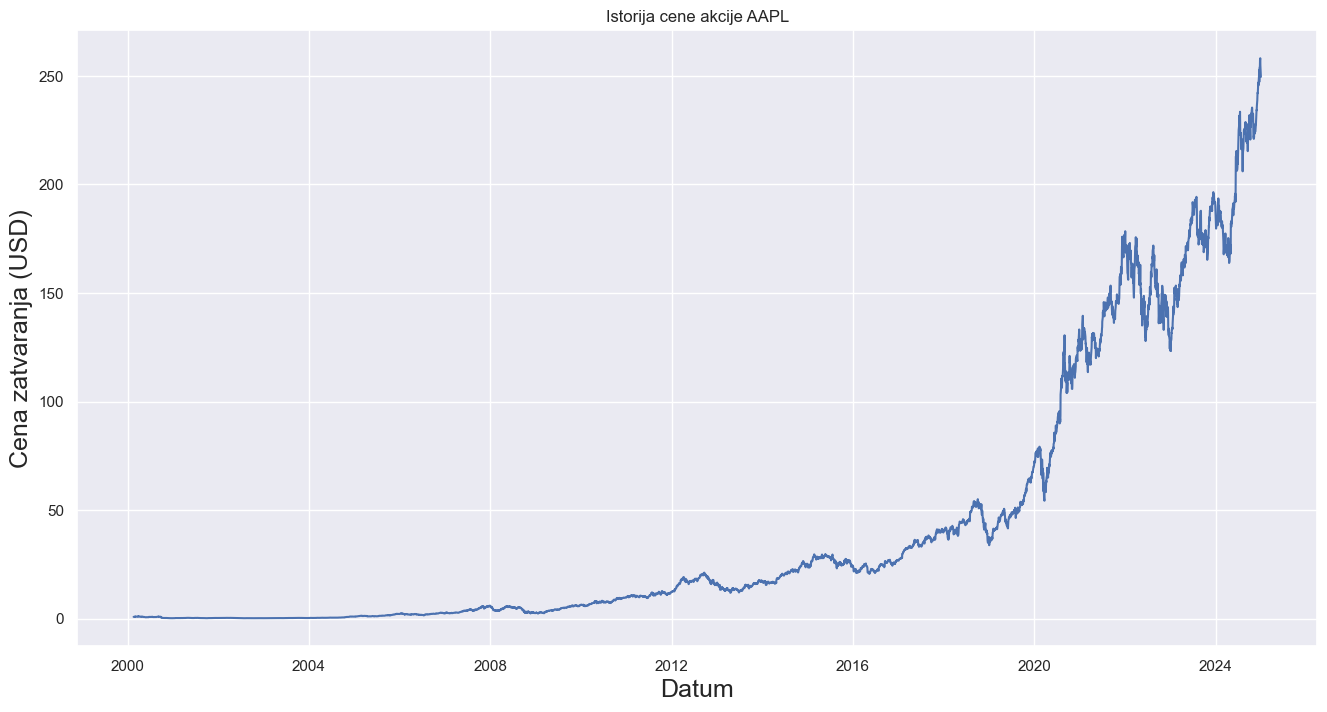

In [4]:
# Izdvajanje kolonu 'Close'
close_data = df.filter(['Close'])

# Vizuelizacija istorijskih podataka o ceni zatvaranja
plt.figure(figsize=(16,8))
plt.title(f'Istorija cene akcije {ticker_symbol}')
plt.plot(df['Close'])
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Cena zatvaranja (USD)', fontsize=18)
plt.show()

Korelacija novih obeležja sa 'Close' cenom:
Close            1.000000
High             0.999936
Low              0.999936
Open             0.999862
EMA_20           0.999153
SMA_20           0.998831
MACDs_12_26_9    0.343200
MACD_12_26_9     0.330688
RSI_14           0.036959
MACDh_12_26_9    0.029232
Volume          -0.462608
Name: Close, dtype: float64




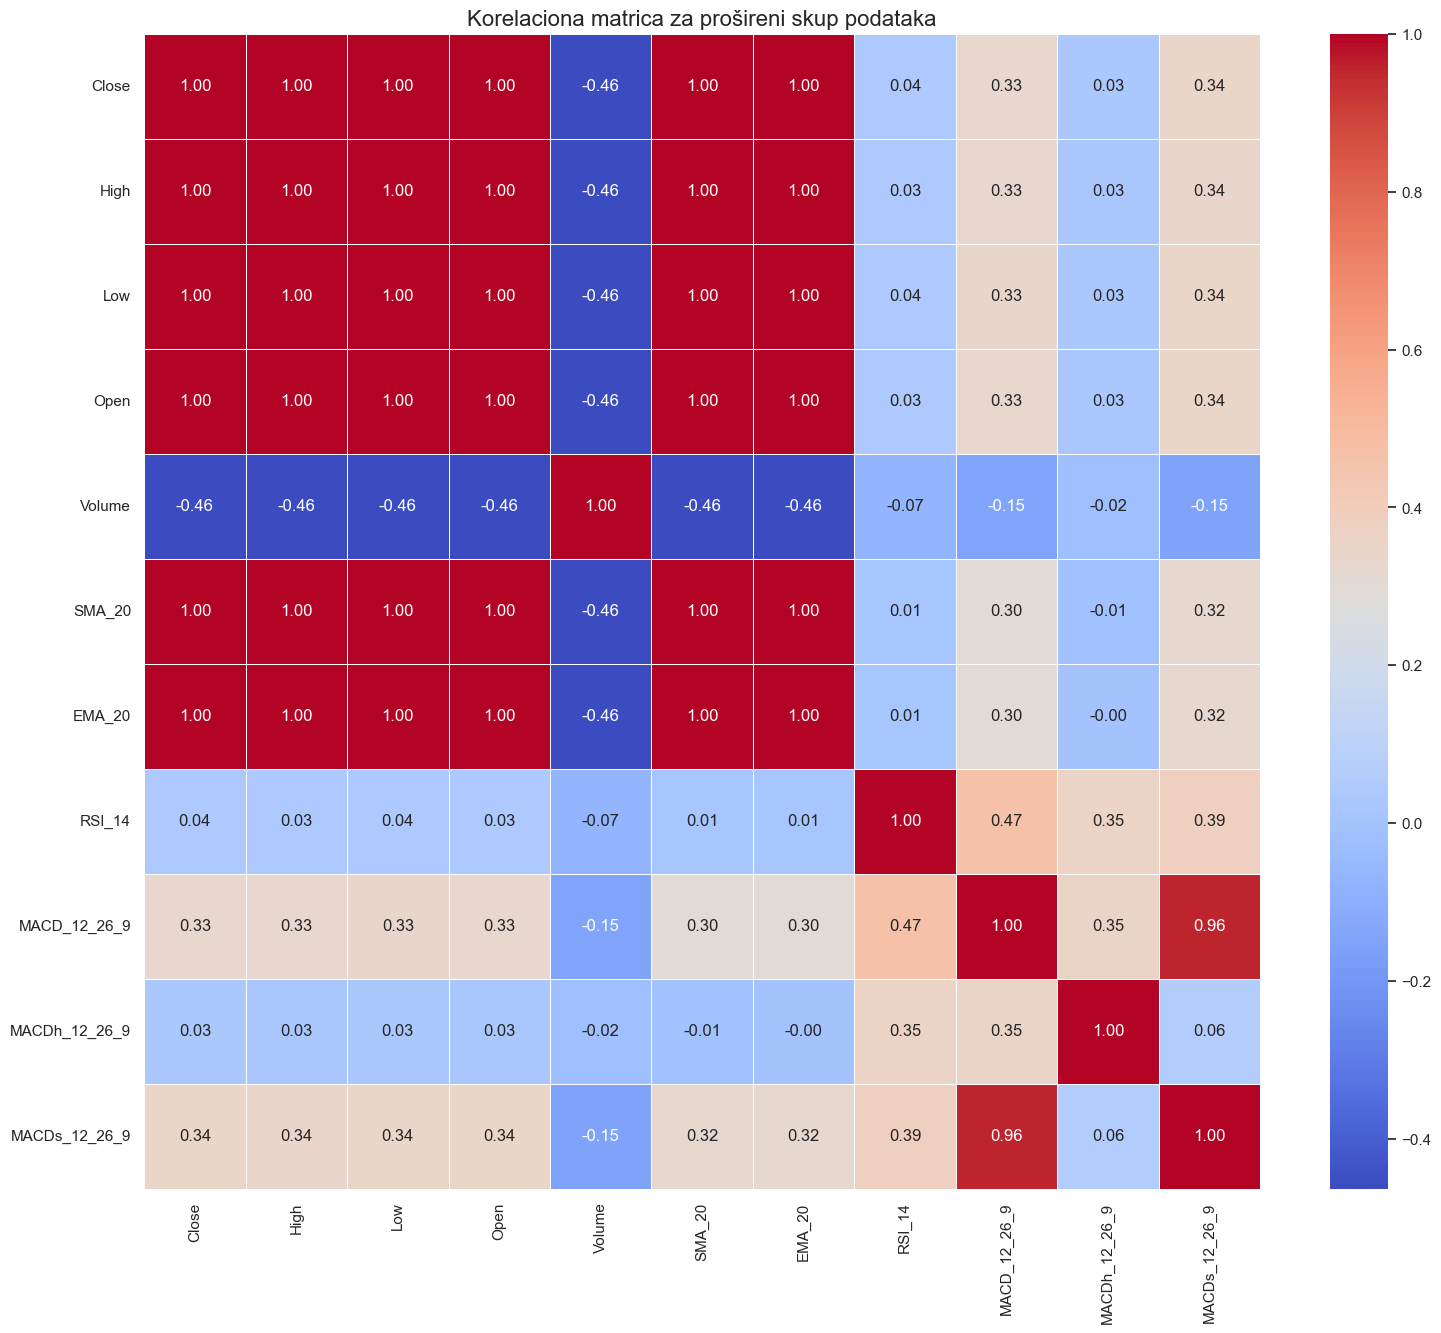

In [ ]:
# --- KORAK ZA ANALIZU KORELACIJE (NAKON DODAVANJA NOVIH POLJA) ---

numerical_df = df.select_dtypes(include=np.number)

# Izračunavamo korelaciju na novom, isključivo numeričkom DataFrame-u
correlation_matrix = numerical_df.corr()

# Prikazujemo samo korelaciju sa ciljnom kolonom 'Close', sortirano
# Ovo nam daje brzi uvid u to koja su nova obeležja najkorisnija
print("Korelacija novih obeležja sa 'Close' cenom:")
print(correlation_matrix['Close'].sort_values(ascending=False))
print("\n")

plt.figure(figsize=(18, 15)) # Povećali smo veličinu sa (10, 8) na (18, 15)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelaciona matrica za prošireni skup podataka', fontsize=16)
plt.show()

In [6]:
from scipy.stats import chi2_contingency
import pandas as pd

print("\n--- TEST #1: Chi-Squared Test Nezavisnosti za 'Daily_Trend' ---")

# Kreiramo novu kolonu koja sadrži trend od prethodnog dana
df['Previous_Day_Trend'] = df['Daily_Trend'].shift(1)

# Uklanjamo prvi red koji sada ima NaN vrednost
df_chi = df.dropna()

# Kreiramo tabelu kontingencije (contingency table) koja broji frekvencije
contingency_table = pd.crosstab(df_chi['Previous_Day_Trend'], df_chi['Daily_Trend'])

print("Tabela kontingencije (uočene frekvencije):")
print(contingency_table)

# Izvršavamo Chi-Squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-Squared test za 'Daily_Trend':")
print(f"Chi2 statistika: {chi2:.4f}")
print(f"P-vrednost: {p_value:.4f}")

if p_value < 0.05:
    print("Zaključak: P-vrednost je manja od 0.05. Postoji zavisnost između jučerašnjeg i današnjeg trenda. Kolona je korisna.")
else:
    print("Zaključak: P-vrednost je veća od 0.05. Nema dokaza o zavisnosti. Kolona možda nije korisna.")

# Brisanje pomoćne kolone odmah nakon testa
if 'Previous_Day_Trend' in df.columns:
    df.drop('Previous_Day_Trend', axis=1, inplace=True)


--- TEST #1: Chi-Squared Test Nezavisnosti za 'Daily_Trend' ---
Tabela kontingencije (uočene frekvencije):
Daily_Trend          Pad  Rast
Previous_Day_Trend            
Pad                 1396  1587
Rast                1587  1685

Chi-Squared test za 'Daily_Trend':
Chi2 statistika: 1.7484
P-vrednost: 0.1861
Zaključak: P-vrednost je veća od 0.05. Nema dokaza o zavisnosti. Kolona možda nije korisna.


In [7]:
from scipy.stats import chi2_contingency
import pandas as pd

print("\n--- Chi-Squared Test Nezavisnosti za 'Day_Name' ---")

# Kreiramo tabelu kontingencije koja broji frekvencije za svaku kombinaciju
# Redovi: Dani u nedelji, Kolone: Dnevni trend
contingency_table_days = pd.crosstab(df['Day_Name'], df['Daily_Trend'])

print("Tabela kontingencije (uočene frekvencije):")
# Ređamo dane radi lakšeg čitanja
print(contingency_table_days.reindex(['Ponedeljak', 'Utorak', 'Sreda', 'Četvrtak', 'Petak']))

# Izvršavamo Chi-Squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table_days)

print(f"\nChi-Squared test za 'Day_Name' vs 'Daily_Trend':")
print(f"Chi2 statistika: {chi2:.4f}")
print(f"P-vrednost: {p_value:.4f}")

if p_value < 0.05:
    print("Zaključak: P-vrednost je manja od 0.05. Postoji statistički značajna veza između dana u nedelji i ishoda (Rast/Pad). Kolona 'Day_Name' je korisna.")
else:
    print("Zaključak: P-vrednost je veća od 0.05. Nema statistički značajne veze. Korisnost kolone 'Day_Name' je upitna.")


--- Chi-Squared Test Nezavisnosti za 'Day_Name' ---
Tabela kontingencije (uočene frekvencije):
Daily_Trend  Pad  Rast
Day_Name              
Ponedeljak   502   671
Utorak       615   668
Sreda        600   683
Četvrtak     617   644
Petak        650   606

Chi-Squared test za 'Day_Name' vs 'Daily_Trend':
Chi2 statistika: 20.8128
P-vrednost: 0.0003
Zaključak: P-vrednost je manja od 0.05. Postoji statistički značajna veza između dana u nedelji i ishoda (Rast/Pad). Kolona 'Day_Name' je korisna.


In [8]:
# Kako skoro sve numericke kolone imaju jako visuku korelaciju sa close cenom jedino ima smisla ukljucivanje Volume i sve MACD kolone 
# Od kategorijskih cu ukljuciti obe i po potrebi izbaciti Daily_Trend kako testovi ukazuju da nema neku korelaciju
# Osnovna ideja je definicija period na osnovu kog predviđamo sledeci dan tj u ovom slucaju na osnovu zadnja dva meseca predvidjamo danasnji dan
prediction_days = 60 

In [ ]:
# 1. Enkodiranje kategorijskih kolona (sada možemo vratiti drop_first=True)
df_encoded = pd.get_dummies(df, columns=['Day_Name', 'Daily_Trend'], drop_first=True)

# 2. Programski sastavljamo listu obeležja
features = [
    'Close', 
    'Volume', 
    'MACD_12_26_9', 
    'MACDh_12_26_9', 
    'MACDs_12_26_9'
]

encoded_cols = [col for col in df_encoded.columns if 'Day_Name_' in col or 'Daily_Trend_' in col]

features.extend(encoded_cols)

data = df_encoded[features]

dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .8))
train_data = dataset[0:training_data_len, :]
test_data = dataset[training_data_len:, :]

data.describe(include='all')

,Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Day_Name_Ponedeljak,Day_Name_Sreda,Day_Name_Utorak,Day_Name_Četvrtak,Daily_Trend_Rast
count,6256.000000,6.256000e+03,6256.000000,6256.000000,6256.000000,6256,6256,6256,6256,6256
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,5083,4973,4973,4995,3272
mean,41.359598,3.851706e+08,0.269977,0.003532,0.266445,NaN,NaN,NaN,NaN,NaN
std,60.103225,3.840199e+08,1.344769,0.398416,1.261807,NaN,NaN,NaN,NaN,NaN
min,0.196932,2.323470e+07,-6.495239,-2.471537,-5.658734,NaN,NaN,NaN,NaN,NaN
25%,2.040992,1.151582e+08,-0.027312,-0.036500,-0.026219,NaN,NaN,NaN,NaN,NaN
50%,13.988145,2.653308e+08,0.032910,0.000486,0.034149,NaN,NaN,NaN,NaN,NaN
75%,44.348412,5.183500e+08,0.314134,0.042862,0.302950,NaN,NaN,NaN,NaN,NaN


In [10]:
# --- KORAK 2: Skaliranje podataka ---

# Kreiramo skaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Skaler će naučiti min/max vrednosti za svaku od vaših 10+ kolona.
scaled_train_data = scaler.fit_transform(train_data)

# Transformišemo test podatke koristeći skaler fitovan na trening podacima.
scaled_test_data = scaler.transform(test_data)

In [11]:
# --- KORAK 3: Kreiranje sekvenci za TRENING skup ---

x_train = []
y_train = []

# Broj dana na osnovu kojih predviđamo ostaje isti
prediction_days = 60 

for i in range(prediction_days, len(scaled_train_data)):
    # x_train dobija 60 prethodnih redova sa svim obeležjima
    x_train.append(scaled_train_data[i-prediction_days:i, :]) # ':' uzima sve kolone
    
    # y_train dobija 61. 'Close' cenu. Ona je i dalje naša prva kolona (indeks 0).
    y_train.append(scaled_train_data[i, 0])

# Konvertovanje u numpy nizove
x_train, y_train = np.array(x_train), np.array(y_train)

print(f"\nDimenzije trening skupa x_train: {x_train.shape}")
print(f"Dimenzije trening skupa y_train: {y_train.shape}")


Dimenzije trening skupa x_train: (4945, 60, 10)
Dimenzije trening skupa y_train: (4945,)


In [12]:
# --- KORAK 4: Kreiranje sekvenci za TEST skup ---

# Kreiramo testni skup. Prvo uzimamo stvarne vrednosti za y_test.
y_test = test_data[prediction_days:, :] # Počinjemo od 61. dana test skupa

# Sada kreiramo x_test. Za svaku vrednost u y_test, treba nam 60 prethodnih dana.
x_test = []

for i in range(len(test_data) - prediction_days):
    # Izdvajamo sekvencu od 60 dana
    x_test.append(scaled_test_data[i:i+prediction_days, :])

# Konvertovanje u numpy niz
x_test = np.array(x_test)

print(f"Dimenzije test skupa x_test: {x_test.shape}")
print(f"Dimenzije test skupa y_test: {y_test.shape}")

Dimenzije test skupa x_test: (1191, 60, 10)
Dimenzije test skupa y_test: (1191, 10)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# --- KORAK 5: Definisanje arhitekture LSTM modela (prilagođeno za više obeležja) ---

# Određujemo broj obeležja (kolona) dinamički iz oblika x_train niza.
n_features = x_train.shape[2]

# Inicijalizacija Sequential modela
model = Sequential()

# Dodajemo ulazni sloj koji sada prihvata sekvence sa 'n_features' obeležja
model.add(Input(shape=(x_train.shape[1], n_features)))

# Ostatak arhitekture ostaje isti, sa tvojim optimizovanim hiperparametrima
model.add(LSTM(units=384, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=384, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(units=1))

# Definisemo optimizer koji je najbolji ispao Adam sa learning rate-om 0.001
optimised_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# --- KORAK 6: Kompajliranje modela ---
model.compile(optimizer=optimised_optimizer, loss='mean_squared_error')

# Prikaz arhitekture modela i broja parametara
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 384)        │       606,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 384)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 384)            │     1,181,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,788,289 (6.82 MB)

 Trainable params: 1,788,289 (6.82 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import time
from tensorflow.keras.callbacks import EarlyStopping

# --- KORAK 7: Treniranje modela sa VALIDACIJOM i RANIM ZAUSTAVLJANJEM ---

# Definišemo pravila za rano zaustavljanje kako ne zelimo overfitovan model
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience= 10,
    restore_best_weights=True
)

# Pokrećemo treniranje sa callback-om
start_time = time.time()
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stopping_callback]
)

end_time = time.time()
training_duration = end_time - start_time
minutes = int(training_duration // 60)
seconds = int(training_duration % 60)

print(f"\nTrening je završen (ili rano zaustavljen) za {minutes} minuta i {seconds} sekundi.")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - loss: 0.0032 - val_loss: 5.3904e-04
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 1.5888e-04 - val_loss: 4.8098e-04
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 1.4706e-04 - val_loss: 4.0626e-04
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 1.1196e-04 - val_loss: 4.0105e-04
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - loss: 9.6530e-05 - val_loss: 4.2984e-04
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - loss: 1.0167e-04 - val_loss: 3.4771e-04
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - loss: 8.6975e-05 - val_loss: 3.6180e-04
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 8.0014e-05 - val_loss: 4.5460e-04
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 7.5539e-05 - val_loss: 3.6494e-04
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 8.4816e-05 - val_loss: 4.2915e-04
Epoch 11/100
140/140 ━━━━━━━━━

In [15]:
# ## PRVI BUILD MODEL KORISCEN ZA BAZICNO TUNE-OVANJE SVIH PARAMETARA
# ## AŽURIRANO ZA RAD SA VIŠE OBELEŽJA

# import tensorflow as tf
# import keras_tuner as kt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# # --- KORAK 5: Definisanje funkcije za izgradnju modela (za KerasTuner) ---

# def build_model(hp):
#     """
#     Ova funkcija gradi model i definiše opsege hiperparametara za pretragu.
#     Sada je prilagođena da radi sa dinamičkim brojem ulaznih obeležja.
#     """
#     model = Sequential()
    
#     # Određujemo broj obeležja dinamički
#     n_features = x_train.shape[2]
    
#     # Ulazni sloj je sada fleksibilan
#     model.add(Input(shape=(x_train.shape[1], n_features))) # <-- VAŽNA IZMENA
    
#     # 1. Tjuniranje broja neurona (jedinica) u LSTM slojevima
#     # Primer opsega: od 64 do 256, sa korakom 32
#     hp_units = hp.Int('units', min_value=192, max_value=256, step=32)
    
#     # 2. Tjuniranje stope za Dropout
#     hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1)

#     # Arhitektura modela
#     model.add(LSTM(units=hp_units, return_sequences=True))
#     model.add(Dropout(rate=hp_dropout))
#     model.add(LSTM(units=hp_units, return_sequences=False))
#     model.add(Dropout(rate=hp_dropout))
#     model.add(Dense(units=1))

#     # 3. Tjuniranje stope učenja (learning rate) za Adam optimizator
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         loss='mean_squared_error'
#     )
    
#     return model

In [16]:
# ## PRVI TUNER KORISCEN ZA BAZICNO TUNE-OVANJE SVIH PARAMETARA

# # --- KORAK 6: Inicijalizacija Tuner-a ---

# # Koristićemo RandomSearch, koji nasumično isprobava kombinacije.
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=2,
#     directory='keras_tuner_dir',
#     project_name='stock_prediction_multi_feature'
# )

# # Prikaz informacija o pretrazi
# tuner.search_space_summary()

In [17]:
# ## DRUGI BUILD MODEL KORISCEN ZA TUNE-OVANJE BROJA NEURONA
# ## AŽURIRANO ZA RAD SA VIŠE OBELEŽJA

# import tensorflow as tf
# import keras_tuner as kt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# def build_model_v2(hp):
#     model = Sequential()
    
#     # Određujemo broj obeležja dinamički
#     n_features = x_train.shape[2]
    
#     # Ulazni sloj je sada fleksibilan
#     model.add(Input(shape=(x_train.shape[1], n_features)))
    
#     # 1. Tjuniranje broja neurona u NOVOM, VIŠEM opsegu
#     hp_units = hp.Int('units', min_value=192, max_value=416, step=32)
    
#     # Fiksiramo dropout i learning_rate na najbolje vrednosti
#     fixed_dropout = 0.1
#     fixed_learning_rate = 0.001

#     # Arhitektura modela
#     model.add(LSTM(units=hp_units, return_sequences=True))
#     model.add(Dropout(rate=fixed_dropout))
#     model.add(LSTM(units=hp_units, return_sequences=False))
#     model.add(Dropout(rate=fixed_dropout))
#     model.add(Dense(units=1))

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=fixed_learning_rate),
#         loss='mean_squared_error'
#     )
    
#     return model

In [18]:
# # DRUGI TUNER KORISCEN ZA TUNE-OVANJE BROJA NEURONA

# # --- KORAK 6 (Runda 2): Inicijalizacija Tuner-a za novu pretragu ---

# # Inicijalizujemo novi tjuner koji će koristiti ažuriranu 'build_model_v2' funkciju.
# tuner_v2 = kt.RandomSearch(
#     build_model_v2,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=2,
#     directory='keras_tuner_dir',
#     project_name='stock_prediction_multi_feature_v2_units'
# )

# tuner_v2.search_space_summary()

In [19]:
# # POKRETANJE PRETRAGE HIPERPARAMETARA

# # --- KORAK 7: Pokretanje pretrage hiperparametara ---

# early_stopping_callback = EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.0001,
#     patience=10,
#     restore_best_weights=True
# )

# print("\n--- Započinjem pretragu hiperparametara ---")

# # tuner je za prvu fazu a tuner_v2 za drugu

# # tuner.search(
# #     x_train,
# #     y_train,
# #     epochs=50, # Dovoljno epoha da svaka proba pokaže svoj potencijal
# #     validation_split=0.2, # Koristimo veći split za pouzdaniju validaciju
# #     callbacks=[early_stopping_callback]
# # )

# tuner_v2.search(
#     x_train,
#     y_train,
#     epochs=50, # Dovoljno epoha da svaka proba pokaže svoj potencijal
#     validation_split=0.2, # Koristimo veći split za pouzdaniju validaciju
#     callbacks=[early_stopping_callback]
# )

# print("\n--- Pretraga završena! ---")

# # best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hps_v2 = tuner_v2.get_best_hyperparameters(num_trials=1)[0]

# # print(f"""
# # Najbolji pronađeni hiperparametri:
# # - Broj jedinica (units): {best_hps.get('units')}
# # - Stopa dropout-a: {best_hps.get('dropout'):.2f}
# # - Stopa učenja (learning rate): {best_hps.get('learning_rate')}
# # """)
# print(f"""
# Rezultati druge runde pretrage:
# - Najbolji broj jedinica (units): {best_hps_v2.get('units')}
# - (Dropout je bio fiksiran na 0.10)
# - (Learning rate je bio fiksiran na 0.001)
# """)

# # best_model = tuner.get_best_models(num_models=1)[0]
# best_model = tuner_v2.get_best_models(num_models=1)[0]

# # Ponovno treniraj najbolji model na svim trening podacima
# print("\n--- Treniram finalni model sa najboljim hiperparametrima ---")
# history = best_model.fit(x_train, y_train, epochs=50, callbacks=[early_stopping_callback], validation_split=0.1)

# model = best_model

In [20]:
# --- KORAK 8: Pravljenje predviđanja na test podacima ---

predictions_scaled = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [21]:
# --- KORAK 9: Vraćanje predviđanja na originalnu skalu (Ažurirano) ---

# 1. Određujemo broj obeležja na kojima je skaler učen
n_features = dataset.shape[1]

# 2. Kreiramo privremeni niz sa ispravnim brojem kolona
# Svi unosi će biti 0, osim prve kolone koju ćemo popuniti
temp_array = np.zeros((len(predictions_scaled), n_features))

# 3. Stavljamo naša predviđanja u prvu kolonu (indeks 0)
# Ovo je ispravno jer je 'Close' bila prva kolona u našem 'features' nizu
temp_array[:, 0] = predictions_scaled.flatten()

# 4. Sada radimo inverznu transformaciju na nizu ispravnih dimenzija
predictions = scaler.inverse_transform(temp_array)

# 5. Na kraju, uzimamo samo prvu kolonu koja sadrži naše de-skalirane 'Close' predikcije
predictions_unscaled = predictions[:, 0]

print("\nPredviđanja su uspešno vraćena na originalnu, dolarsku skalu.")


Predviđanja su uspešno vraćena na originalnu, dolarsku skalu.


Provera dimenzija nakon poravnanja:
Dimenzije y_test_aligned (stvarne vrednosti): (1191,)
Dimenzije predictions_unscaled (predviđene vrednosti): (1191,)

Evaluacija modela na test podacima:
Root Mean Squared Error (RMSE): $18.02


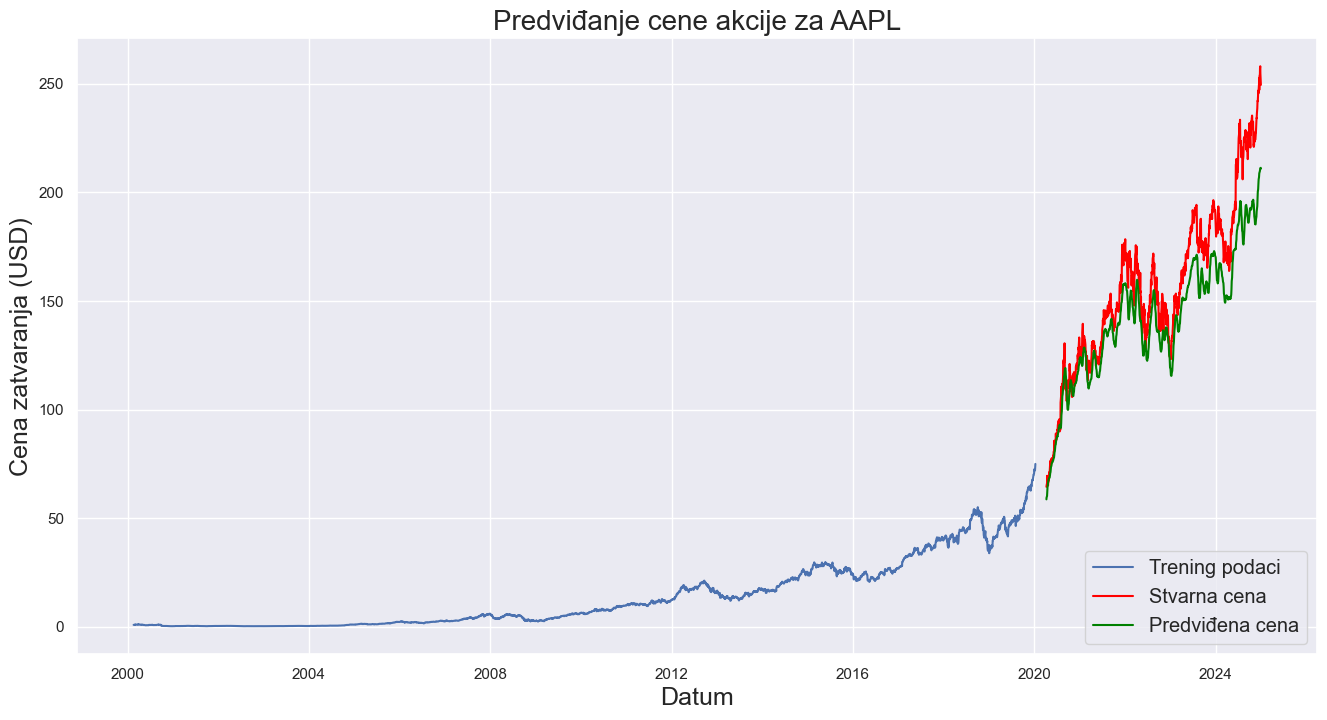


Poslednjih nekoliko stvarnih i predviđenih cena:
                Actual  Predictions Percentage_Difference
Date                                                     
2024-12-24  257.286682   210.348534               -18.24%
2024-12-26  258.103729   210.788084               -18.33%
2024-12-27  254.685883   211.243388               -17.06%
2024-12-30  251.307877   211.322020               -15.91%
2024-12-31  249.534180   211.017099               -15.44%


In [22]:
from sklearn.metrics import mean_squared_error

# --- KORAK 10: Evaluacija modela - računanje RMSE ---

# Preskačemo prvih 'prediction_days' (60) vrednosti jer za njih nemamo predikciju.
y_test_aligned = dataset[training_data_len + prediction_days:, 0]

print("Provera dimenzija nakon poravnanja:")
print(f"Dimenzije y_test_aligned (stvarne vrednosti): {y_test_aligned.shape}")
print(f"Dimenzije predictions_unscaled (predviđene vrednosti): {predictions_unscaled.shape}")

rmse = np.sqrt(mean_squared_error(y_test_aligned, predictions_unscaled))

print(f"\nEvaluacija modela na test podacima:")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


# --- KORAK 11: Vizuelizacija rezultata ---
data_for_plot = df[['Close']]
train = data_for_plot[:training_data_len]

valid_start_index = training_data_len + prediction_days
valid = data_for_plot[valid_start_index:].copy()

valid['Predictions'] = predictions_unscaled
valid.rename(columns={'Close': 'Actual'}, inplace=True)

# Izračunavanje procentualne razlike za svaki dan
# Formula: ((Predviđeno - Stvarno) / Stvarno) * 100
actual_values = valid['Actual'].values.flatten()
prediction_values = valid['Predictions'].values.flatten()

valid['Percentage_Difference'] = ((prediction_values - actual_values) / actual_values) * 100

plt.figure(figsize=(16,8))
plt.title(f'Predviđanje cene akcije za {ticker_symbol}', fontsize=20)
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Cena zatvaranja (USD)', fontsize=18)

plt.plot(train['Close'], label='Trening podaci')
plt.plot(valid['Actual'], color='red', label='Stvarna cena')
plt.plot(valid['Predictions'], color='green', label='Predviđena cena')

plt.legend(loc='lower right', fontsize='large')
plt.show()

# Prikaz poslednjih nekoliko predviđanja
print("\nPoslednjih nekoliko stvarnih i predviđenih cena:")
print(
    valid.tail().to_string(
        formatters={'Percentage_Difference': '{:.2f}%'.format}
    )
)